In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Droping null values
df = df.dropna()

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# Check duplicate
df["customerID"].duplicated().sum()

np.int64(0)

#Convert 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [7]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

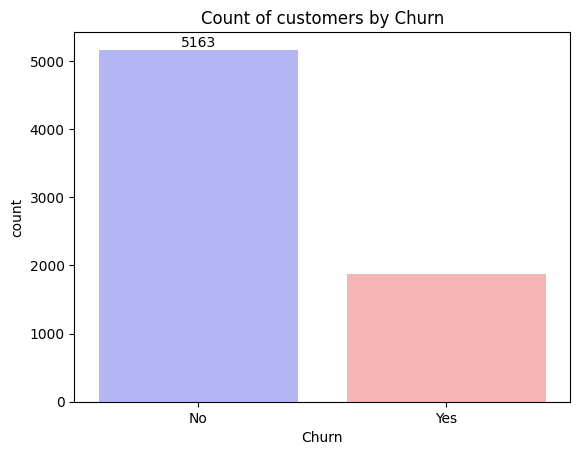

In [8]:
ax = sns.countplot(x = 'Churn', data = df,hue="Churn",palette="bwr")

ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show()

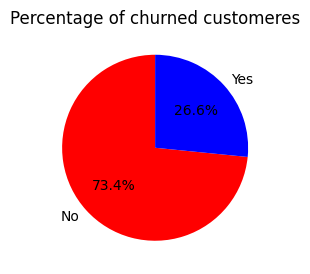

In [9]:
gb = df.groupby("Churn").agg({'Churn':"count"})

plt.figure(figsize=(3,4))
plt.pie(gb['Churn'],labels=gb.index, autopct='%1.1f%%', startangle=90, colors=['red', 'blue'])
plt.title("Percentage of churned customeres")
plt.show()

*From the given pie chart we can conclude thata 26.54% of our customers have churned out.*
* #Now let's explore the reason behind it*

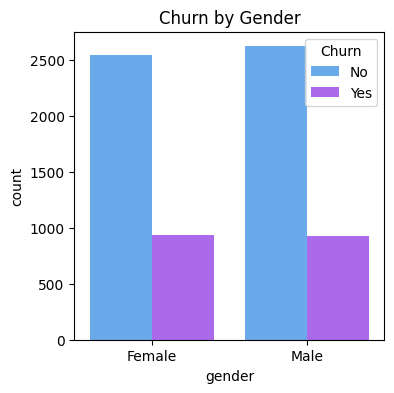

In [10]:
plt.figure(figsize=(4,4))
sns.countplot(x="gender", data = df, hue='Churn',palette='cool')
plt.title('Churn by Gender')
plt.show()

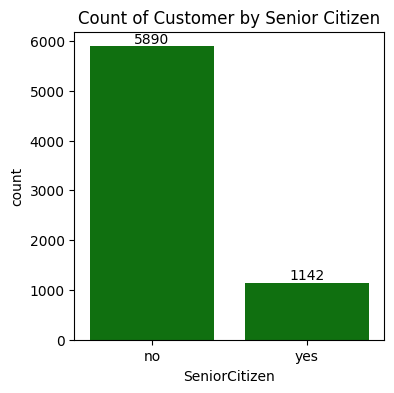

In [11]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x="SeniorCitizen", data = df,color="g")
ax.bar_label(ax.containers[0])
plt.title('Count of Customer by Senior Citizen')
plt.show()

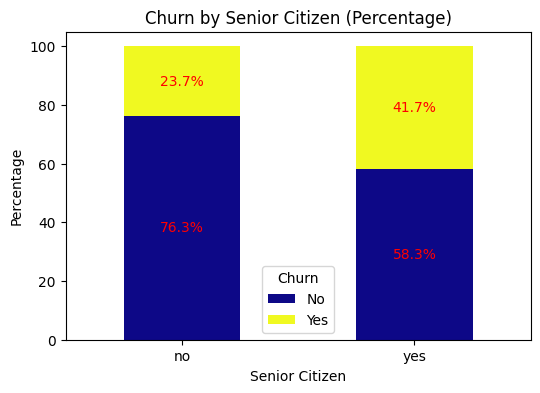

In [12]:
# Compute counts and normalize to percentage
grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100  # Convert to percentage

# Plot stacked bar chart
ax = grouped_percent.plot(kind='bar', stacked=True, colormap='plasma', figsize=(6, 4))

# Add percentage labels on bars
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.1f%%', label_type='center', fontsize=10, color='red')

# Titles and labels
plt.title("Churn by Senior Citizen (Percentage)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.legend(title="Churn")
plt.xticks(rotation=0)
plt.show()

*Comparative a greater percentage of people in senior citizen category have churned.*

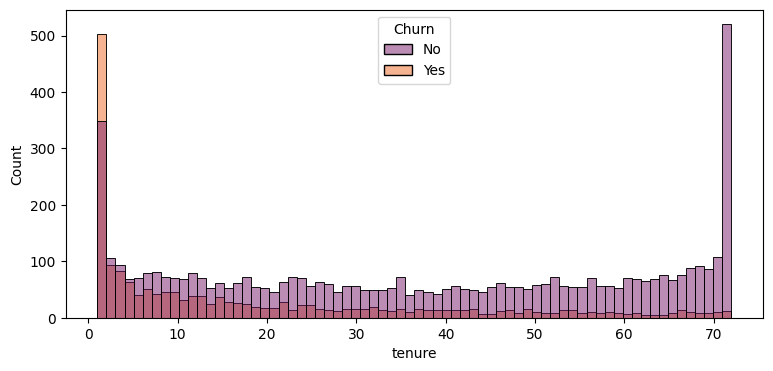

In [13]:
plt.figure(figsize=(9,4))
sns.histplot(x= "tenure", data = df, bins=70, hue="Churn", palette='inferno')
plt.show()

*People who have used our services for long time have stayed and people who have used our services. 
#1 or 2 months have churned*

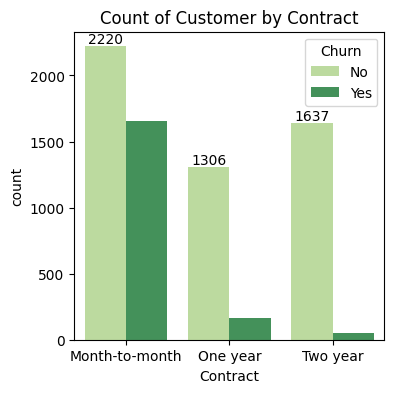

In [14]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x="Contract", data = df, hue="Churn", palette="YlGn")
ax.bar_label(ax.containers[0])
plt.title('Count of Customer by Contract')
plt.show()

*People who have month to month contract are likely to churn then from those who have 1 or 2 years of contract*

In [15]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

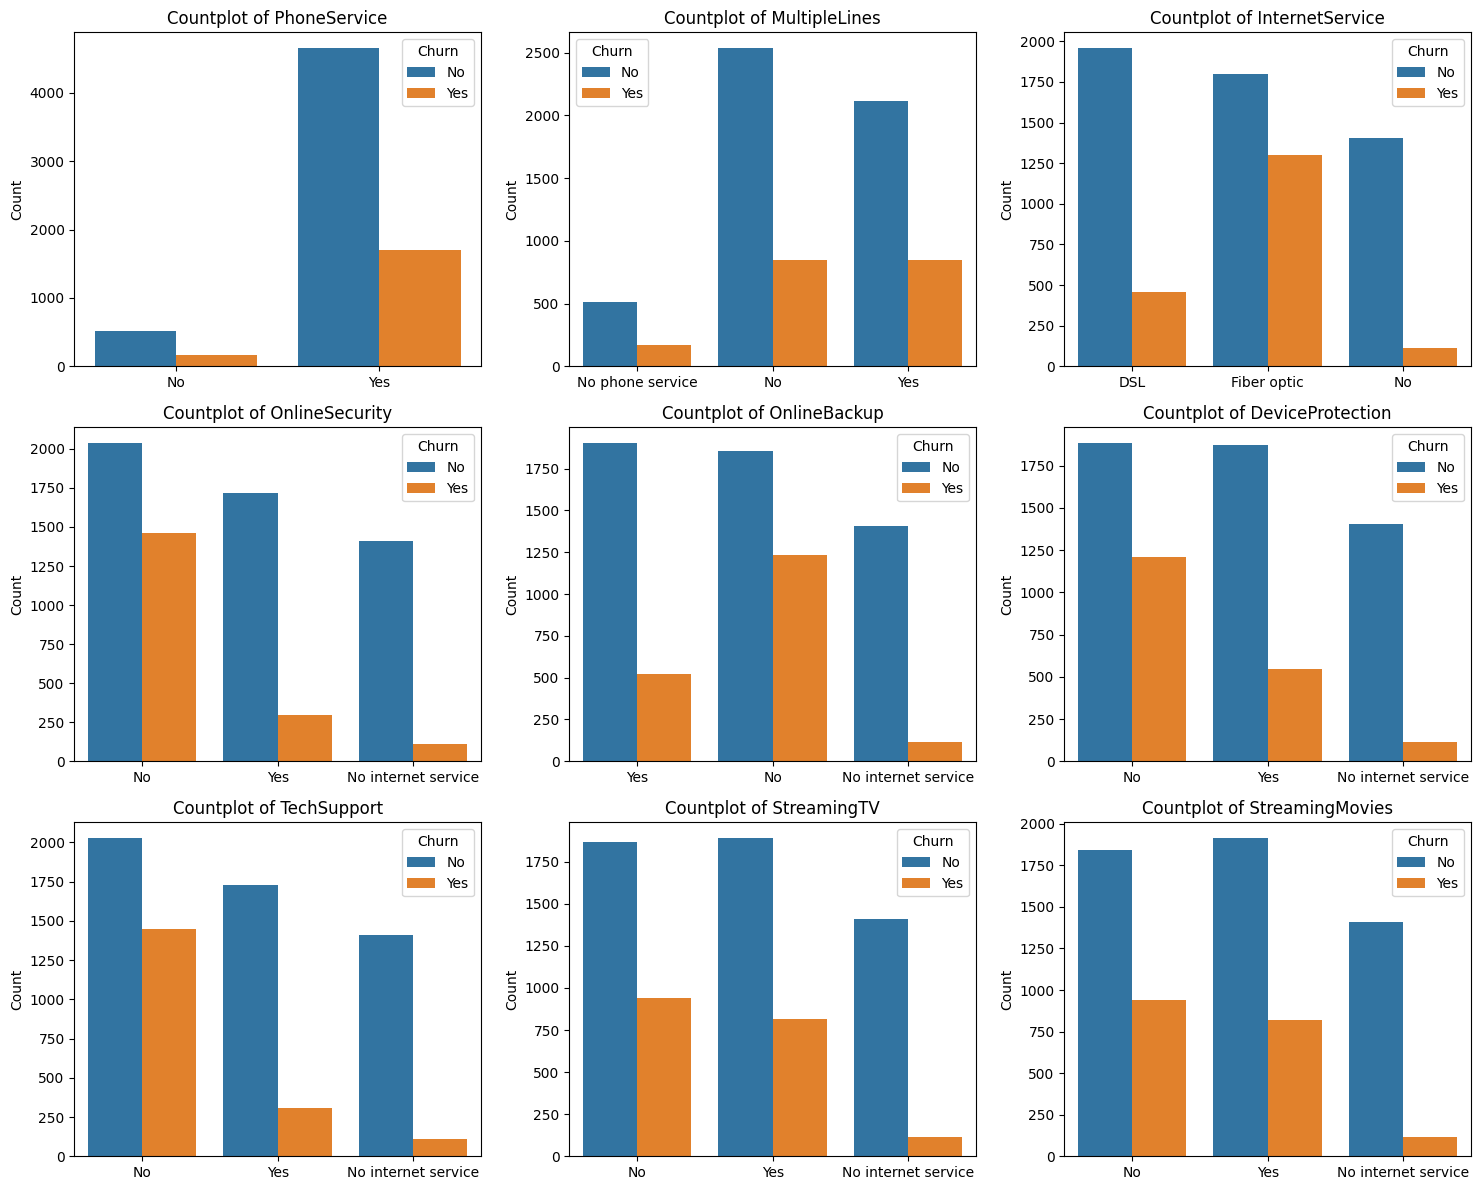

In [16]:
# Define columns to visualize
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  # 3x3 grid
axes = axes.flatten()  # Flatten to make iteration easier

# Loop through columns and plot countplots
for i, col in enumerate(cols):
    sns.countplot(x=df[col], ax=axes[i], hue=df["Churn"])
    axes[i].set_title(f"Countplot of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x')  # Rotate x labels for better readability

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

*The majority of customers who do not churn tend to have services like phoneService, InternetService (Particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.*

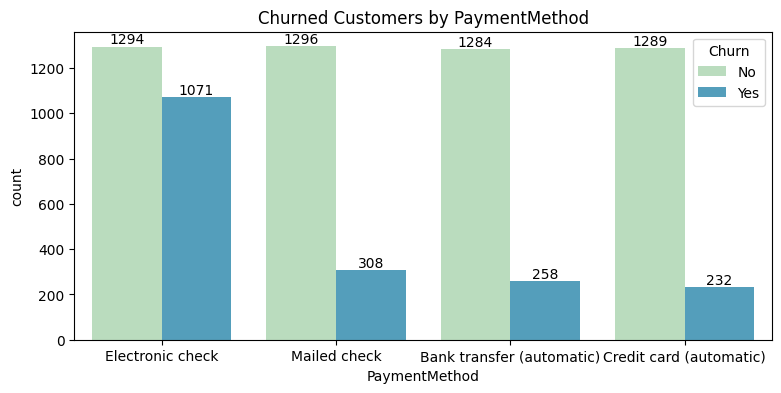

In [17]:
plt.figure(figsize=(9,4))
ax = sns.countplot(x="PaymentMethod", data = df, hue="Churn", palette="GnBu")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churned Customers by PaymentMethod')
plt.show()

*Customer is likely to churn when he is using electronic check as a payment method*